# Importing Libraries


In [2]:
from pyspark.sql import SparkSession, Row, DataFrame

from pyspark.storagelevel import StorageLevel

from pyspark.sql.functions import (
    col,
    desc,
    asc,
    count_distinct,
    avg,
    stddev,
    format_number,
    mean,
    dayofmonth,
    dayofyear,
    month,
    year,
    hour,
    weekofyear,
    date_format,
    spark_partition_id,
)

from pyspark.sql.types import StringType, StructField, StructType, IntegerType

# Tools


In [3]:
def get_records_per_partition(input_df: DataFrame) -> DataFrame:
    return (
        input_df.withColumn("spark_partition_id", spark_partition_id())
        .groupBy("spark_partition_id")
        .count()
    )

# Creating a Spark Session

> Builder is a class whereas builder initializes the Builder class

## Understanding The Spark Session

A SparkSession can be used to create DataFrame, register DataFrame as tables, execute SQL over tables, cache tables, and read parquet files. To create a SparkSession, use the following builder pattern.

## Methods

| Method | Description |
|--------|-------------|
| `active()` | Returns the active or default SparkSession for the current thread, returned by the builder. |
| `addArtifact(*path[, pyfile, archive, file])` | Add artifact(s) to the client session. |
| `addArtifacts(*path[, pyfile, archive, file])` | Add artifact(s) to the client session. |
| `addTag(tag)` | Add a tag to be assigned to all the operations started by this thread in this session. |
| `clearTags()` | Clear the current thread’s operation tags. |
| `copyFromLocalToFs(local_path, dest_path)` | Copy file from local to cloud storage file system. |
| `createDataFrame(data[, schema, …])` | Creates a DataFrame from an RDD, a list, a pandas.DataFrame, or a numpy.ndarray. |
| `getActiveSession()` | Returns the active SparkSession for the current thread, returned by the builder. |
| `getTags()` | Get the tags that are currently set to be assigned to all the operations started by this thread. |
| `interruptAll()` | Interrupt all operations of this session currently running on the connected server. |
| `interruptOperation(op_id)` | Interrupt an operation of this session with the given operationId. |
| `interruptTag(tag)` | Interrupt all operations of this session with the given operation tag. |
| `newSession()` | Returns a new SparkSession as a new session, that has separate SQLConf, registered temporary views, and UDFs, but shared SparkContext and table cache. |
| `range(start[, end, step, numPartitions])` | Create a DataFrame with a single `pyspark.sql.types.LongType` column named `id`, containing elements in a range from start to end (exclusive) with step value `step`. |
| `removeTag(tag)` | Remove a tag previously added to be assigned to all the operations started by this thread in this session. |
| `sql(sqlQuery[, args])` | Returns a DataFrame representing the result of the given query. |
| `stop()` | Stop the underlying SparkContext. |
| `table(tableName)` | Returns the specified table as a DataFrame. |

## Attributes

| Attribute | Description |
|-----------|-------------|
| `builder` | Provides access to the Builder class for creating SparkSession. |
| `catalog` | Interface for creating, dropping, altering, or querying underlying databases, tables, functions, etc. |
| `client` | Gives access to the Spark Connect client. |
| `conf` | Runtime configuration interface for Spark. |
| `read` | Returns a `DataFrameReader` that can be used to read data as a DataFrame. |
| `readStream` | Returns a `DataStreamReader` that can be used to read data streams as a streaming DataFrame. |
| `sparkContext` | Returns the underlying `SparkContext`. |
| `streams` | Returns a `StreamingQueryManager` that allows managing all the `StreamingQuery` instances active on this context. |
| `udf` | Returns a `UDFRegistration` for UDF registration. |
| `udtf` | Returns a `UDTFRegistration` for UDTF registration. |
| `version` | The version of Spark on which this application is running. |



In [4]:
spark = SparkSession.builder.appName("Spark Basics").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/20 23:19:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/02/20 23:19:51 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/02/20 23:19:51 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
25/02/20 23:19:51 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


- active() : Returns the active or default SparkSession for the current thread, returned by the builder.


In [5]:
spark.active()

- getActiveSession() : Returns the active SparkSession for the current thread, returned by the builder


In [6]:
spark.getActiveSession()

- newSession() : Returns a new SparkSession as new session, that has separate SQLConf, registered temporary views and UDFs, but shared SparkContext and table cache.


In [7]:
spark = spark.newSession()
print(spark)

- range(start[, end, step, numPartitions]) : Create a DataFrame with single pyspark.sql.types.LongType column named id, containing elements in a range from start to end (exclusive) with step value step.


In [10]:
spark.range(1, 1000).show()

+---+
| id|
+---+
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
| 20|
+---+
only showing top 20 rows



In [11]:
print(spark.version)

3.5.4


# Storage Levels in Spark

## Memory only Storage level

StorageLevel.MEMORY_ONLY is the default behavior of the RDD cache() method and stores the RDD or DataFrame as deserialized objects to JVM memory. When there is not enough memory available it will not save DataFrame of some partitions and these will be re-computed as and when required.

This takes more memory. but unlike RDD, this would be slower than MEMORY_AND_DISK level as it recomputes the unsaved partitions, and recomputing the in-memory columnar representation of the underlying table is expensive.

## Serialize in Memory

StorageLevel.MEMORY_ONLY_SER is the same as MEMORY_ONLY but the difference being it stores `RDD as serialized objects to JVM memory.` It takes lesser memory (space-efficient) than MEMORY_ONLY as it saves objects as serialized and takes an additional few more CPU cycles in order to deserialize.

## Memory only and Replicate

StorageLevel.MEMORY_ONLY_2 is same as MEMORY_ONLY storage level but replicate each partition to two cluster nodes.

## Serialized in Memory and Replicate

StorageLevel.MEMORY_ONLY_SER_2 is same as MEMORY_ONLY_SER storage level but replicate each partition to two cluster nodes.

## Memory and Disk Storage level

StorageLevel.MEMORY_AND_DISK is the default behavior of the DataFrame or Dataset. In this Storage Level, The DataFrame will be stored in JVM memory as deserialized objects. When required storage is greater than available memory, it stores some of the excess partitions into a disk and reads the data from the disk when required. It is slower as there is I/O involved.

## Serialize in Memory and Disk

StorageLevel.MEMORY_AND_DISK_SER is same as MEMORY_AND_DISK storage level difference being it serializes the DataFrame objects in memory and on disk when space is not available.

## Memory, Disk and Replicate

StorageLevel.MEMORY_AND_DISK_2 is Same as MEMORY_AND_DISK storage level but replicate each partition to two cluster nodes.

## Serialize in Memory, Disk and Replicate

StorageLevel.MEMORY_AND_DISK_SER_2 is same as MEMORY_AND_DISK_SER storage level but replicate each partition to two cluster nodes.

## Disk only storage level

In StorageLevel.DISK_ONLY storage level, DataFrame is stored only on disk and the CPU computation time is high as I/O involved.

## Disk only and Replicate

StorageLevel.DISK_ONLY_2 is same as DISK_ONLY storage level but replicate each partition to two cluster nodes.

| Storage Level       | Space used | CPU time | In memory | On-disk | Serialized | Recompute some partitions |
| ------------------- | ---------- | -------- | --------- | ------- | ---------- | ------------------------- |
| MEMORY_ONLY         | High       | Low      | Y         | N       | N          | Y                         |
| MEMORY_ONLY_SER     | Low        | High     | Y         | N       | Y          | Y                         |
| MEMORY_AND_DISK     | High       | Medium   | Some      | Some    | Some       | N                         |
| MEMORY_AND_DISK_SER | Low        | High     | Some      | Some    | Y          | N                         |
| DISK_ONLY           | Low        | High     | N         | Y       | Y          | N                         |


# Reading a Dataset

## Spark DataFrameReader

Use `SparkSession.read` to access this.

Quick function review:

- `csv(path)`
- `jdbc(url, table, ..., connectionProperties)`
- `json(path)`
- `format(source)`
- `load(path)`
- `orc(path)`
- `parquet(path)`
- `table(tableName)`
- `text(path)`
- `textFile(path)`

Configuration methods:

- `option(key, value)`
- `options(map)`
- `schema(schema)`

### Header:

If the csv file have a header (column names in the first row) then set header=true. This will use the first row in the csv file as the dataframe's column names. Setting header=false (default option) will result in a dataframe with default column names: \_c0, \_c1, \_c2, etc.

Setting this to true or false should be based on your input file.

### Schema:

The schema refered to here are the column types. A column can be of type String, Double, Long, etc. Using inferSchema=false (default option) will give a dataframe where all columns are strings (StringType). Depending on what you want to do, strings may not work. For example, if you want to add numbers from different columns, then those columns should be of some numeric type (strings won't work).

By setting inferSchema=true, Spark will automatically go through the csv file and infer the schema of each column. This requires an extra pass over the file which will result in reading a file with inferSchema set to true being slower. But in return the dataframe will most likely have a correct schema given its input.

### Faster Method

As an alternative to reading a csv with inferSchema you can provide the schema while reading. This have the advantage of being faster than inferring the schema while giving a dataframe with the correct column types. In addition, for csv files without a header row, column names can be given automatically. To provde schema see e.g.: Provide schema while reading csv file as a dataframe

### CSV w/InferSchema

- we still have three columns
- all three columns are still **nullable**
- all three columns have their proper names
- two jobs were executed (not one as in the previous example)
- our three columns now have distinct data types:
  - **timestamp** == **timestamp**
  - **site** == **string**
  - **requests** == **integer**

**Question:** Why were there two jobs?

inferSchema option tells the reader to infer data types from the source file. This results in an additional pass over the file resulting in two Spark jobs being triggered.

**Question:** How long did the last job take?

Command took 31.69 seconds -- by kaeshur_pirate@proton.me at 18/11/2023, 3:15:56 pm on My Cluster

**Question:** Why did it take so much longer?

Bec spark needs to scan the whole file in infer schema

### CSV w/ User-Defined Schema

- We still have three columns
- All three columns are **NOT** nullable because we declared them as such.
- All three columns have their proper names
- Zero jobs were executed
- Our three columns now have distinct data types:
  - **timestamp** == **string**
  - **site** == **string**
  - **requests** == **integer**

**Question:** Why were there no jobs?

When you define the schema, Spark doesn’t need to perform the costly scan of the entire dataset to infer data types and structures. No need to read the header (line #1) or infer the schema (entire file).
That same information is now declared in the user-defined schema.

**Question:** What is different about the data types of these columns compared to the previous exercise & why?

The timestamp column is now of type string because we declared it as such.

**Question:** Do I need to indicate that the file has a header?

Yes, otherwise, line #1 will be treated as data and not as a header.

**Question:** Do the declared column names need to match the columns in the header of the TSV file?
No, and you can demonstrate that by renaming it in the schema to something like capturedAt.
When reading a CSV file using Apache Spark and defining well-defined data types, the column definitions specified in your code should align with the actual columns present in the CSV file.


### Infer Schema

Pros

- Simplicity: It’s easy to use, especially for quick data exploration or when the schema is not known in advance.
- Less code: You don’t need to manually specify the schema, which reduces the amount of code you need to write.

Cons

- Performance Overhead: Spark needs to scan the entire dataset to infer the schema, which can be computationally expensive, especially for large datasets.
- Data Quality: Inference may lead to incorrect schema deductions if the data has missing or inconsistent values.
- Type Inference: Inferencing may not always correctly identify the data types of columns, leading to potential data type mismatches.

### Define Schema Explicitly

Pros

- Performance: Defining the schema explicitly can significantly improve performance because Spark doesn’t need to scan the entire dataset to infer the schema.
- Data Quality: You have control over the schema definition, ensuring that it accurately represents your data. This is important for data integrity and consistency.

Cons

- More Code: You need to write additional code to define the schema, which can be more cumbersome, especially for complex datasets or when the schema evolves over time.

### Performance Comparison

- In terms of performance, defining the schema explicitly is generally more efficient than inferring it. When you define the schema, Spark doesn’t need to perform the costly scan of the entire dataset to infer data types and structures.

- Explicit schema definition is particularly advantageous for large datasets where schema inference can introduce a significant overhead.

- If data quality and performance are critical for your application, defining the schema explicitly is often the preferred approach, especially for production-level code.

However, it’s essential to strike a balance between performance and development speed. In some scenarios, such as quick data exploration or ad-hoc analysis, inferring the schema might be acceptable. Ultimately, the choice between inferring and defining the schema should consider factors like data quality, development effort, and the specific requirements of your Spark application.


### Reaing JSON Lines

JSON Lines is a text file format that stores JSON values one per line, with a line separator of '\\n' or '\\r\\n'.

This format is referred to as **JSON Lines** or **newline-delimited JSON**


In [219]:
people_df = spark.read.json("./datasets/people.json")

### Reading CSV Files

The formats CSV [RFC4180] (comma separated values) and TSV [IANA-TSV] (tab separated values) provide simple, easy to process formats for the transmission of tabular data. They are supported as input datat formats to many tools, particularly spreadsheets. This document describes their use for expressing SPARQL query results from SELECT queries.


In [220]:
appl_stock_df = spark.read.options(inferSchema=True, header=True).csv(
    "./datasets/appl_stock.csv"
)

In [221]:
sales_info_df = (
    spark.read.option("inferSchema", True)
    .option("header", True)
    .csv("./datasets/sales_info.csv")
)

In [222]:
contains_null_df = (
    spark.read.option("inferSchema", True)
    .option("header", True)
    .csv("./datasets/ContainsNull.csv")
)

### Reading Files with custom Schema


In [223]:
data_schema = [
    StructField(name="age", dataType=IntegerType(), nullable=True),
    StructField(name="name", dataType=StringType(), nullable=True),
]
final_structure = StructType(fields=data_schema)

people_df_custom_schema = spark.read.json(
    "./datasets/people.json", schema=final_structure
)

### Reading Data in Parquet Format

Apache Parquet is an open source, column-oriented data file format designed for efficient data storage and retrieval. It provides efficient data compression and encoding schemes with enhanced performance to handle complex data in bulk. Parquet is available in multiple languages including Java, C++, Python, etc...

#### About Parquet Files

- Free & Open Source.
- Increased query performance over row-based data stores.
- Provides efficient data compression.
- Designed for performance on large data sets.
- Supports limited schema evolution.
- Is a splittable "file format".
- A <a href="https://en.wikipedia.org/wiki/Column-oriented_DBMS" target="_blank">Column-Oriented</a> data store

- We do not need to specify the schema - the column names and data types are stored in the parquet files.
- Only one job is required to **read** that schema from the parquet file's metadata.
- Unlike the CSV or JSON readers that have to load the entire file and then infer the schema, the parquet reader can "read" the schema very quickly because it's reading that schema from the metadata.

#### Read in the Parquet Files

To read in this files, we will specify the location of the parquet directory.


In [224]:
flights_df = spark.read.parquet("./datasets/flights.parquet")

# Dataframe Methods


## DataFrame.show() → None[source]

Parameters

1. n int, optional Number of rows to show.

2. truncate bool or int, optional If set to True, truncate strings longer than 20 chars by default. If set to a number greater than one, truncates long strings to length truncate and align cells right.
3. vertical bool, optional If set to True, print output rows vertically (one line per column value).


In [225]:
people_df.show()

+----+------+-------+
| age|height|   name|
+----+------+-------+
|NULL|  NULL|   NULL|
|NULL|  NULL|Michael|
|NULL|    80|Michael|
|NULL|    80|Michael|
|  30|    80|   Andy|
|  31|    80|   Andy|
|  18|    80| Justin|
|  19|    80| Justin|
+----+------+-------+



In [226]:
people_df.show(truncate=False, n=2, vertical=True)

-RECORD 0---------
 age    | NULL    
 height | NULL    
 name   | NULL    
-RECORD 1---------
 age    | NULL    
 height | NULL    
 name   | Michael 
only showing top 2 rows



## DataFrame.printSchema() → None

1. level int, optional, default -> None : How many levels to print for nested schemas.


In [227]:
people_df.printSchema()

root
 |-- age: long (nullable = true)
 |-- height: long (nullable = true)
 |-- name: string (nullable = true)



In [228]:
nested_df = spark.createDataFrame([(1, (2, 2))], ["a", "b"])

In [229]:
nested_df.printSchema(1)
nested_df.printSchema(2)
del nested_df

root
 |-- a: long (nullable = true)
 |-- b: struct (nullable = true)

root
 |-- a: long (nullable = true)
 |-- b: struct (nullable = true)
 |    |-- _1: long (nullable = true)
 |    |-- _2: long (nullable = true)



## DataFrame.describe() → pyspark.sql.dataframe.DataFrame

cols str, list, optional Column name or list of column names to describe by (default All columns).


In [230]:
people_df.describe().show()

+-------+-----------------+------+-------+
|summary|              age|height|   name|
+-------+-----------------+------+-------+
|  count|                4|     6|      7|
|   mean|             24.5|  80.0|   NULL|
| stddev|6.952217871538069|   0.0|   NULL|
|    min|               18|    80|   Andy|
|    max|               31|    80|Michael|
+-------+-----------------+------+-------+



In [231]:
people_df.describe(["age"]).show()

+-------+-----------------+
|summary|              age|
+-------+-----------------+
|  count|                4|
|   mean|             24.5|
| stddev|6.952217871538069|
|    min|               18|
|    max|               31|
+-------+-----------------+



## DataFrame.agg() → pyspark.sql.dataframe.DataFrame

Aggregate on the entire DataFrame without groups (shorthand for df.groupBy().agg()).

### Parameters

    exprs Column or dict of key and value strings, Columns or expressions to aggregate DataFrame by.

### Returns

    DataFrame: Aggregated DataFrame.


In [232]:
people_df.agg({"age": "max"}).show()
# people_df.groupBy().agg({"age": "max"}).show() # same

+--------+
|max(age)|
+--------+
|      31|
+--------+



## DataFrame.alias(alias: str) → pyspark.sql.dataframe.DataFrame

### Parameters

    alias str: an alias name to be set for the DataFrame.

### Returns

    DataFrame: Aliased DataFrame.


In [233]:
people_df_alias_1 = people_df.alias("people_df_1")
people_df_alias_2 = people_df.alias("people_df_2")

people_df_alias_1.join(
    people_df_alias_2, col("people_df_1.name") == col("people_df_2.name"), how="inner"
).show()

+----+------+-------+----+------+-------+
| age|height|   name| age|height|   name|
+----+------+-------+----+------+-------+
|NULL|  NULL|Michael|NULL|    80|Michael|
|NULL|  NULL|Michael|NULL|    80|Michael|
|NULL|  NULL|Michael|NULL|  NULL|Michael|
|NULL|    80|Michael|NULL|    80|Michael|
|NULL|    80|Michael|NULL|    80|Michael|
|NULL|    80|Michael|NULL|  NULL|Michael|
|NULL|    80|Michael|NULL|    80|Michael|
|NULL|    80|Michael|NULL|    80|Michael|
|NULL|    80|Michael|NULL|  NULL|Michael|
|  30|    80|   Andy|  31|    80|   Andy|
|  30|    80|   Andy|  30|    80|   Andy|
|  31|    80|   Andy|  31|    80|   Andy|
|  31|    80|   Andy|  30|    80|   Andy|
|  18|    80| Justin|  19|    80| Justin|
|  18|    80| Justin|  18|    80| Justin|
|  19|    80| Justin|  19|    80| Justin|
|  19|    80| Justin|  18|    80| Justin|
+----+------+-------+----+------+-------+



## DataFrame.approxQuantile() → Union[List[float], List[List[float]]]

Calculates the approximate quantiles of numerical columns of a DataFrame.

The result of this algorithm has the following deterministic bound: If the DataFrame has N elements and if we request the quantile at probability p up to error err, then the algorithm will return a sample x from the DataFrame so that the exact rank of x is close to (p \* N). More precisely,

floor((p - err) _ N) <= rank(x) <= ceil((p + err) _ N).

This method implements a variation of the Greenwald-Khanna algorithm (with some speed optimizations). The algorithm was first present in [[https://doi.org/10.1145/375663.375670 Space-efficient Online Computation of Quantile Summaries]] by Greenwald and Khanna.

### Parameters

    1. col: str, tuple or list: Can be a single column name, or a list of names for multiple columns.

    2. probabilities list or tuple: a list of quantile probabilities Each number must belong to [0, 1]. For example 0 is the minimum, 0.5 is the median, 1 is the maximum.

    3. relativeError float: The relative target precision to achieve (>= 0). If set to zero, the exact quantiles are computed, which could be very expensive. Note that values greater than 1 are accepted but gives the same result as 1.

### Returns

    list
    the approximate quantiles at the given probabilities.

    If the input col is a string, the output is a list of floats.

    If the input col is a list or tuple of strings, the output is also a
    list, but each element in it is a list of floats, i.e., the output is a list of list of floats.


In [234]:
people_df.approxQuantile(col="age", probabilities=[0.5], relativeError=0.25)

[18.0]

## DataFrame.cache() → pyspark.sql.dataframe.DataFrame[source]

Persists the DataFrame with the default storage level (MEMORY_AND_DISK).

### Returns

    DataFrame: Cached DataFrame.


In [235]:
people_df.cache()

DataFrame[age: bigint, height: bigint, name: string]

## DataFrame.persist() → pyspark.sql.dataframe.DataFrame

### Parameters

    storageLevel StorageLevel: Storage level to set for persistence. Default is MEMORY_AND_DISK_DESER.

### Returns

    DataFrame: Persisted DataFrame.


In [236]:
people_df.persist(StorageLevel.MEMORY_AND_DISK)

DataFrame[age: bigint, height: bigint, name: string]

## DataFrame.unpersist()) → pyspark.sql.dataframe.DataFrame

Marks the DataFrame as non-persistent, and remove all blocks for it from memory and disk.

### Parameters

    blocking bool
    Whether to block until all blocks are deleted.

### Returns

    DataFrame
    Unpersisted DataFrame.


In [237]:
people_df.unpersist(blocking=True)

DataFrame[age: bigint, height: bigint, name: string]

## DataFrame.checkpoint() → pyspark.sql.dataframe.DataFrame

Returns a checkpointed version of this DataFrame. Checkpointing can be used to truncate the logical plan of this DataFrame, which is especially useful in iterative algorithms where the plan may grow exponentially. It will be saved to files inside the checkpoint directory set with SparkContext.setCheckpointDir().

### Parameters

    eager bool, optional, default True: Whether to checkpoint this DataFrame immediately.

### Returns

    DataFrame: Checkpointed DataFrame.


## DataFrame.coalesce(numPartitions: int) → pyspark.sql.dataframe.DataFrame[source]

Similar to coalesce defined on an RDD, this operation results in a narrow dependency, e.g. if you go from 1000 partitions to 100 partitions, there will not be a shuffle, instead each of the 100 new partitions will claim 10 of the current partitions. If a larger number of partitions is requested, it will stay at the current number of partitions.

However, if you’re doing a drastic coalesce, e.g. to numPartitions = 1, this may result in your computation taking place on fewer nodes than you like (e.g. one node in the case of numPartitions = 1). To avoid this, you can call repartition(). This will add a shuffle step, but means the current upstream partitions will be executed in parallel (per whatever the current partitioning is).

### Parameters

    numPartitions int
    specify the target number of partitions

### Returns

    DataFrame


In [238]:
people_df.coalesce(1).rdd.getNumPartitions()

1

## DataFrame.colRegex(colName: str) → pyspark.sql.column.Column

### Parameters

    colName str
    string, column name specified as a regex.

### Returns

    Column


In [239]:
people_df.select(people_df.colRegex("`(name)?+.+`")).show()

+----+------+
| age|height|
+----+------+
|NULL|  NULL|
|NULL|  NULL|
|NULL|    80|
|NULL|    80|
|  30|    80|
|  31|    80|
|  18|    80|
|  19|    80|
+----+------+



## DataFrame.collect() → List[pyspark.sql.types.Row]

Returns all the records as a list of Row.

### Returns

    list
    List of rows.


In [240]:
people_df.collect()

[Row(age=None, height=None, name=None),
 Row(age=None, height=None, name='Michael'),
 Row(age=None, height=80, name='Michael'),
 Row(age=None, height=80, name='Michael'),
 Row(age=30, height=80, name='Andy'),
 Row(age=31, height=80, name='Andy'),
 Row(age=18, height=80, name='Justin'),
 Row(age=19, height=80, name='Justin')]

## DataFrame.corr() → float

Calculates the correlation of two columns of a DataFrame as a double value. Currently only supports the Pearson Correlation Coefficient. DataFrame.corr() and DataFrameStatFunctions.corr() are aliases of each other.

### Parameters

    col1 str
    The name of the first column

    col2 str
    The name of the second column

    method str, optional
    The correlation method. Currently only supports “pearson”

### Returns

    float
    Pearson Correlation Coefficient of two columns.


In [241]:
# people_df.corr("age", "name")

## DataFrame.createGlobalTempView(name: str) → None

Creates a global temporary view with this DataFrame.
The lifetime of this temporary view is tied to this `Spark application`. throws TempTableAlreadyExistsException, if the view name already exists in the catalog.

### Parameters

    name str
    Name of the view.

#### Register a Table/View

- Databrick's UI has built in support for working with a number of different data sources
- New ones are being added regularly
- In our case we are going to upload the file <a href="http://files.training.databricks.com/static/data/pageviews_by_second_example.tsv">pageviews_by_second_example.tsv</a>
- .. and then use the UI to create a table.

There are several benefits to this strategy:

- Once setup, it never has to be done again
- It is available for any user on the platform (permissions permitting)
- Minimizes exposure of credentials
- No real overhead to reading the schema (no infer-schema)
- Easier to advertise available datasets to other users

#### Review: Reading from Tables

- No job is executed - the schema is stored in the table definition on Databricks.
- The data types shown here are those we defined when we registered the table.
- In our case, the file was uploaded to Databricks and is stored on the DBFS.
  - If we used JDBC, it would open the connection to the database and read it in.
  - If we used an object store (like what is backing the DBFS), it would read the data from source.
- The "registration" of the table simply makes future access, or access by multiple users easier.
- The users of the notebook cannot see username and passwords, secret keys, tokens, etc.

** _Note #1:_ ** _The method createOrReplaceTempView(..) is bound to the SparkSession meaning it will be discarded once the session ends._

** _Note #2:_ ** On the other hand, the method createOrReplaceGlobalTempView(..) is bound to the spark application.\*

`_Or to put that another way, I can use createOrReplaceTempView(..) in this notebook only. However, I can call createOrReplaceGlobalTempView(..) in this notebook and then access it from another._`


In [242]:
# people_df.createGlobalTempView("people_df_global_temp_view")
# spark.sql("select * from global_temp.people_df_global_temp_view").show()

In [243]:
people_df.createOrReplaceGlobalTempView("people_df_global_temp_view")
spark.sql("select * from global_temp.people_df_global_temp_view").show()

+----+------+-------+
| age|height|   name|
+----+------+-------+
|NULL|  NULL|   NULL|
|NULL|  NULL|Michael|
|NULL|    80|Michael|
|NULL|    80|Michael|
|  30|    80|   Andy|
|  31|    80|   Andy|
|  18|    80| Justin|
|  19|    80| Justin|
+----+------+-------+



## DataFrame.createTempView(name: str) → None

Creates a local temporary view with this DataFrame.

The lifetime of this temporary table is tied to the `SparkSession` that was used to create this DataFrame.throws TempTableAlreadyExistsException, if the view name already exists in the catalog.

### Parameters

    name str
    Name of the view.


In [244]:
# people_df.createTempView("people_df_temp_view")
# spark.sql("select * from people_df_temp_view").show()

In [245]:
people_df.createOrReplaceTempView("people_df_temp_view")
spark.sql("select * from people_df_temp_view").show()

+----+------+-------+
| age|height|   name|
+----+------+-------+
|NULL|  NULL|   NULL|
|NULL|  NULL|Michael|
|NULL|    80|Michael|
|NULL|    80|Michael|
|  30|    80|   Andy|
|  31|    80|   Andy|
|  18|    80| Justin|
|  19|    80| Justin|
+----+------+-------+



## DataFrame.crossJoin(other: pyspark.sql.dataframe.DataFrame) → pyspark.sql.dataframe.DataFrame

Returns the cartesian product with another DataFrame.

### Parameters

    other DataFrame
    Right side of the cartesian product.

### Returns

    DataFrame
    Joined DataFrame.


In [246]:
people_df.crossJoin(people_df.select("age")).show()

+----+------+-------+----+
| age|height|   name| age|
+----+------+-------+----+
|NULL|  NULL|   NULL|NULL|
|NULL|  NULL|   NULL|NULL|
|NULL|  NULL|   NULL|NULL|
|NULL|  NULL|   NULL|NULL|
|NULL|  NULL|   NULL|  30|
|NULL|  NULL|   NULL|  31|
|NULL|  NULL|   NULL|  18|
|NULL|  NULL|   NULL|  19|
|NULL|  NULL|Michael|NULL|
|NULL|  NULL|Michael|NULL|
|NULL|  NULL|Michael|NULL|
|NULL|  NULL|Michael|NULL|
|NULL|  NULL|Michael|  30|
|NULL|  NULL|Michael|  31|
|NULL|  NULL|Michael|  18|
|NULL|  NULL|Michael|  19|
|NULL|    80|Michael|NULL|
|NULL|    80|Michael|NULL|
|NULL|    80|Michael|NULL|
|NULL|    80|Michael|NULL|
+----+------+-------+----+
only showing top 20 rows



## DataFrame.distinct() → pyspark.sql.dataframe.DataFrame

#### Returns

    DataFrame
    DataFrame with distinct records.


In [247]:
people_df.distinct().show()

+----+------+-------+
| age|height|   name|
+----+------+-------+
|  19|    80| Justin|
|  30|    80|   Andy|
|  18|    80| Justin|
|  31|    80|   Andy|
|NULL|  NULL|   NULL|
|NULL|  NULL|Michael|
|NULL|    80|Michael|
+----+------+-------+



## DataFrame.drop(\*cols: ColumnOrName) → DataFrame[source]

Returns a new DataFrame without specified columns. This is a no-op if the schema doesn’t contain the given column name(s).

### Parameters

    cols: str or :class:`Column`
    a name of the column, or the Column to drop

### Returns

    DataFrame
    DataFrame without given columns.


In [248]:
people_df.drop("age").show()

people_df.drop("agasdasdasde").show()  ## no op

+------+-------+
|height|   name|
+------+-------+
|  NULL|   NULL|
|  NULL|Michael|
|    80|Michael|
|    80|Michael|
|    80|   Andy|
|    80|   Andy|
|    80| Justin|
|    80| Justin|
+------+-------+

+----+------+-------+
| age|height|   name|
+----+------+-------+
|NULL|  NULL|   NULL|
|NULL|  NULL|Michael|
|NULL|    80|Michael|
|NULL|    80|Michael|
|  30|    80|   Andy|
|  31|    80|   Andy|
|  18|    80| Justin|
|  19|    80| Justin|
+----+------+-------+



## DataFrame.dropDuplicates(subset: Optional[List[str]] = None) → pyspark.sql.dataframe.DataFrame

Return a new DataFrame with duplicate rows removed, optionally only considering certain columns.

For a static batch DataFrame, it just drops duplicate rows. For a streaming DataFrame, it will keep all data across triggers as intermediate state to drop duplicates rows. You can use withWatermark() to limit how late the duplicate data can be and the system will accordingly limit the state. In addition, data older than watermark will be dropped to avoid any possibility of duplicates.

`drop_duplicates() is an alias for dropDuplicates().`

### Parameters

    subset List of column names, optional
    List of columns to use for duplicate comparison (default All columns).

### Returns

    DataFrame
    DataFrame without duplicates.


In [249]:
people_df.show()
people_df.dropDuplicates().show()
people_df.dropDuplicates(subset=["name", "height"]).show()

+----+------+-------+
| age|height|   name|
+----+------+-------+
|NULL|  NULL|   NULL|
|NULL|  NULL|Michael|
|NULL|    80|Michael|
|NULL|    80|Michael|
|  30|    80|   Andy|
|  31|    80|   Andy|
|  18|    80| Justin|
|  19|    80| Justin|
+----+------+-------+

+----+------+-------+
| age|height|   name|
+----+------+-------+
|  19|    80| Justin|
|  30|    80|   Andy|
|  18|    80| Justin|
|  31|    80|   Andy|
|NULL|  NULL|   NULL|
|NULL|  NULL|Michael|
|NULL|    80|Michael|
+----+------+-------+

+----+------+-------+
| age|height|   name|
+----+------+-------+
|  30|    80|   Andy|
|NULL|  NULL|   NULL|
|NULL|  NULL|Michael|
|  18|    80| Justin|
|NULL|    80|Michael|
+----+------+-------+



## DataFrame.dropna() → pyspark.sql.dataframe.DataFrame

Returns a new DataFrame omitting rows with null values. DataFrame.dropna() and DataFrameNaFunctions.drop() are aliases of each other.

### Parameters

    how str, optional
    ‘any’ or ‘all’. If ‘any’, drop a row if it contains any nulls. If ‘all’, drop a row only if all its values are null.

    thresh: int, optional
    default None If specified, drop rows that have less than thresh non-null values. This overwrites the how parameter.

    subset str, tuple or list, optional
    optional list of column names to consider.

### Returns

    DataFrame
    DataFrame with null only rows excluded.


In [250]:
people_df.show()
# people_df.dropna(how="any", subset=["height"]).show()
people_df.dropna(how="any", subset=["height", "age"]).show()

+----+------+-------+
| age|height|   name|
+----+------+-------+
|NULL|  NULL|   NULL|
|NULL|  NULL|Michael|
|NULL|    80|Michael|
|NULL|    80|Michael|
|  30|    80|   Andy|
|  31|    80|   Andy|
|  18|    80| Justin|
|  19|    80| Justin|
+----+------+-------+

+---+------+------+
|age|height|  name|
+---+------+------+
| 30|    80|  Andy|
| 31|    80|  Andy|
| 18|    80|Justin|
| 19|    80|Justin|
+---+------+------+



## DataFrame.fillna() → DataFrame

Replace null values, alias for na.fill(). DataFrame.fillna() and DataFrameNaFunctions.fill() are aliases of each other.

### Parameters

    value int, float, string, bool or dict
    Value to replace null values with. If the value is a dict, then subset is ignored and value must be a mapping from column name (string) to replacement value. The replacement value must be an int, float, boolean, or string.

    subset str, tuple or list, optional
    optional list of column names to consider. Columns specified in subset that do not have matching data types are ignored. For example, if value is a string, and subset contains a non-string column, then the non-string column is simply ignored.

> The replacement datatype should be same as the column datatype

### Returns

    DataFrame
    DataFrame with replaced null values.


In [251]:
people_df.show()
people_df.fillna(value=60, subset=["age", "height"]).show()

+----+------+-------+
| age|height|   name|
+----+------+-------+
|NULL|  NULL|   NULL|
|NULL|  NULL|Michael|
|NULL|    80|Michael|
|NULL|    80|Michael|
|  30|    80|   Andy|
|  31|    80|   Andy|
|  18|    80| Justin|
|  19|    80| Justin|
+----+------+-------+

+---+------+-------+
|age|height|   name|
+---+------+-------+
| 60|    60|   NULL|
| 60|    60|Michael|
| 60|    80|Michael|
| 60|    80|Michael|
| 30|    80|   Andy|
| 31|    80|   Andy|
| 18|    80| Justin|
| 19|    80| Justin|
+---+------+-------+



In [252]:
contains_null_df.show()
# people_df.fillna(value=60, subset=["age", "height"]).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| NULL|
|emp2| NULL| NULL|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
|NULL| NULL| NULL|
|emp5| emp5|456.0|
+----+-----+-----+



In [253]:
people_df.fillna({"age": 50, "name": "unknown", "height": 0}).show()

+---+------+-------+
|age|height|   name|
+---+------+-------+
| 50|     0|unknown|
| 50|     0|Michael|
| 50|    80|Michael|
| 50|    80|Michael|
| 30|    80|   Andy|
| 31|    80|   Andy|
| 18|    80| Justin|
| 19|    80| Justin|
+---+------+-------+



## DataFrame.filter(condition: ColumnOrName) → DataFrame

Filters rows using the given condition.

where() is an alias for filter().

### Condition Symbols

1. `&` : AND operator
2. `|` : OR Operator
3. `~` : NOT Operator

### Parameters

    condition Column or str
    a Column of types.BooleanType or a string of SQL expressions.

### Returns

    DataFrame
    Filtered DataFrame.


### Filter by Column instances.


In [254]:
appl_stock_df.filter(appl_stock_df.Close < 500).show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

### Filter by SQL expression in a string.


In [255]:
appl_stock_df.filter("Close < 500").show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

### Filtering based on multiple conditions


In [256]:
appl_stock_df.filter("Close < 100 and Open < 200").show()

+----------+-----------------+---------+---------+-----------------+---------+-----------------+
|      Date|             Open|     High|      Low|            Close|   Volume|        Adj Close|
+----------+-----------------+---------+---------+-----------------+---------+-----------------+
|2014-06-09|        92.699997|93.879997|    91.75|        93.699997| 75415000|        88.906324|
|2014-06-10|        94.730003|95.050003|    93.57|            94.25| 62777000|        89.428189|
|2014-06-11|        94.129997|94.760002|93.470001|        93.860001| 45681000|        89.058142|
|2014-06-12|        94.040001|94.120003|91.900002|        92.290001| 54749000|        87.568463|
|2014-06-13|        92.199997|92.440002|90.879997|        91.279999| 54525000|        86.610132|
|2014-06-16|        91.510002|    92.75|91.449997|        92.199997| 35561000|        87.483064|
|2014-06-17|        92.309998|92.699997|91.800003|92.08000200000001| 29726000|87.36920699999999|
|2014-06-18|        92.269997|

In [257]:
appl_stock_df.filter(
    (appl_stock_df["Open"] < 500) & (appl_stock_df["Close"] > 500)
).show()

+----------+------------------+------------------+------------------+------------------+---------+-----------------+
|      Date|              Open|              High|               Low|             Close|   Volume|        Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+-----------------+
|2012-02-13|        499.529991|503.83000899999996|497.08998899999995|502.60002099999997|129304000|        65.116633|
|2012-02-16|        491.500008|        504.890007|         486.62999|502.20999900000004|236138000|        65.066102|
|2013-01-16|494.63999900000005|509.44001799999995|492.49997699999994|506.08998099999997|172701200|        66.151072|
|2013-01-18|        498.519981|        502.219986|        496.399986|        500.000015|118230700|        65.355052|
|2013-10-17|        499.979988|        504.779991|        499.680008|        504.499985| 63398300|        67.207422|
|2014-01-31|        495.179985|        501.529984|        493.54

In [258]:
appl_stock_df.filter((appl_stock_df.Open < 500) | ~(appl_stock_df.Close > 500)).show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [259]:
results = appl_stock_df.filter(
    appl_stock_df.Low == 197.16
).collect()  # returns results in list of row class

In [260]:
firstrow = results[0]

In [261]:
print(firstrow, type(firstrow))

Row(Date=datetime.date(2010, 1, 22), Open=206.78000600000001, High=207.499996, Low=197.16, Close=197.75, Volume=220441900, Adj Close=25.620401) <class 'pyspark.sql.types.Row'>


In [262]:
firstrowasdict = firstrow.asDict()
print(firstrowasdict)
print(firstrowasdict["Open"])

{'Date': datetime.date(2010, 1, 22), 'Open': 206.78000600000001, 'High': 207.499996, 'Low': 197.16, 'Close': 197.75, 'Volume': 220441900, 'Adj Close': 25.620401}
206.78000600000001


## DataFrame.select(\*cols: ColumnOrName) → DataFrame

Projects a set of expressions and returns a new DataFrame.

### Parameters

    cols str, Column, or list
    column names (string) or expressions (Column). If one of the column names is ‘*’, that column is expanded to include all columns in the current DataFrame.

### Returns

    DataFrame
    A DataFrame with subset (or all) of columns.


In [263]:
people_df.select("*").show()

+----+------+-------+
| age|height|   name|
+----+------+-------+
|NULL|  NULL|   NULL|
|NULL|  NULL|Michael|
|NULL|    80|Michael|
|NULL|    80|Michael|
|  30|    80|   Andy|
|  31|    80|   Andy|
|  18|    80| Justin|
|  19|    80| Justin|
+----+------+-------+



In [264]:
people_df.select(
    people_df.name, people_df.age, (people_df.age + 10).alias("age+10")
).show()

+-------+----+------+
|   name| age|age+10|
+-------+----+------+
|   NULL|NULL|  NULL|
|Michael|NULL|  NULL|
|Michael|NULL|  NULL|
|Michael|NULL|  NULL|
|   Andy|  30|    40|
|   Andy|  31|    41|
| Justin|  18|    28|
| Justin|  19|    29|
+-------+----+------+



### The column object


In [265]:
print(type(people_df.age), type(people_df["age"]))

<class 'pyspark.sql.column.Column'> <class 'pyspark.sql.column.Column'>


In [266]:
people_df.select(
    people_df["name"], people_df["age"], (people_df["age"] + 10).alias("age+10")
).show()

+-------+----+------+
|   name| age|age+10|
+-------+----+------+
|   NULL|NULL|  NULL|
|Michael|NULL|  NULL|
|Michael|NULL|  NULL|
|Michael|NULL|  NULL|
|   Andy|  30|    40|
|   Andy|  31|    41|
| Justin|  18|    28|
| Justin|  19|    29|
+-------+----+------+



## DataFrame.withColumn() → pyspark.sql.dataframe.DataFrame

Returns a new DataFrame by adding a column or replacing the existing column that has the same name.
The column expression must be an expression over this DataFrame; attempting to add a column from some other DataFrame will raise an error.

### Parameters

    colName str
    string, name of the new column.

    col Column
    a Column expression for the new column.

### Returns

    DataFrame
    DataFrame with new or replaced column.


In [267]:
people_df.withColumn(colName="age2", col=people_df["age"] + 2).show()
people_df.withColumn(colName="age2", col=people_df.age + 2).show()
people_df.withColumn(colName="age2", col=col("age") + 2).show()

+----+------+-------+----+
| age|height|   name|age2|
+----+------+-------+----+
|NULL|  NULL|   NULL|NULL|
|NULL|  NULL|Michael|NULL|
|NULL|    80|Michael|NULL|
|NULL|    80|Michael|NULL|
|  30|    80|   Andy|  32|
|  31|    80|   Andy|  33|
|  18|    80| Justin|  20|
|  19|    80| Justin|  21|
+----+------+-------+----+

+----+------+-------+----+
| age|height|   name|age2|
+----+------+-------+----+
|NULL|  NULL|   NULL|NULL|
|NULL|  NULL|Michael|NULL|
|NULL|    80|Michael|NULL|
|NULL|    80|Michael|NULL|
|  30|    80|   Andy|  32|
|  31|    80|   Andy|  33|
|  18|    80| Justin|  20|
|  19|    80| Justin|  21|
+----+------+-------+----+

+----+------+-------+----+
| age|height|   name|age2|
+----+------+-------+----+
|NULL|  NULL|   NULL|NULL|
|NULL|  NULL|Michael|NULL|
|NULL|    80|Michael|NULL|
|NULL|    80|Michael|NULL|
|  30|    80|   Andy|  32|
|  31|    80|   Andy|  33|
|  18|    80| Justin|  20|
|  19|    80| Justin|  21|
+----+------+-------+----+



## DataFrame.withColumnRenamed() → pyspark.sql.dataframe.DataFrame

Returns a new DataFrame by renaming an existing column. This is a no-op if the schema doesn’t contain the given column name.

### Parameters

    existing str
    string, name of the existing column to rename.

    new str
    string, new name of the column.

### Returns

    DataFrame
    DataFrame with renamed column.


In [268]:
people_df.withColumnRenamed(existing="name", new="newName").show()

+----+------+-------+
| age|height|newName|
+----+------+-------+
|NULL|  NULL|   NULL|
|NULL|  NULL|Michael|
|NULL|    80|Michael|
|NULL|    80|Michael|
|  30|    80|   Andy|
|  31|    80|   Andy|
|  18|    80| Justin|
|  19|    80| Justin|
+----+------+-------+



## DataFrame.withColumns() → pyspark.sql.dataframe.DataFrame

Returns a new DataFrame by adding multiple columns or replacing the existing columns that have the same names.
The colsMap is a map of column name and column, the column must only refer to attributes supplied by this Dataset. It is an error to add columns that refer to some other Dataset.

### Parameters

    cols Mapdict
    a dict of column name and Column. Currently, only a single map is supported.

### Returns

    DataFrame
    DataFrame with new or replaced columns.


In [269]:
people_df.withColumns({"age2": people_df.age + 2, "age3": people_df.age + 3}).show()

+----+------+-------+----+----+
| age|height|   name|age2|age3|
+----+------+-------+----+----+
|NULL|  NULL|   NULL|NULL|NULL|
|NULL|  NULL|Michael|NULL|NULL|
|NULL|    80|Michael|NULL|NULL|
|NULL|    80|Michael|NULL|NULL|
|  30|    80|   Andy|  32|  33|
|  31|    80|   Andy|  33|  34|
|  18|    80| Justin|  20|  21|
|  19|    80| Justin|  21|  22|
+----+------+-------+----+----+



## DataFrame.withColumnsRenamed() → pyspark.sql.dataframe.DataFrame

Returns a new DataFrame by renaming multiple columns. This is a no-op if the schema doesn’t contain the given column names.

### Parameters

    cols Mapdict
    a dict of existing column names and corresponding desired column names. Currently, only a single map is supported.

### Returns

    DataFrame
    DataFrame with renamed columns.


In [270]:
people_df.withColumnsRenamed({"age": "age4", "name": "newName"}).show()

+----+------+-------+
|age4|height|newName|
+----+------+-------+
|NULL|  NULL|   NULL|
|NULL|  NULL|Michael|
|NULL|    80|Michael|
|NULL|    80|Michael|
|  30|    80|   Andy|
|  31|    80|   Andy|
|  18|    80| Justin|
|  19|    80| Justin|
+----+------+-------+



## DataFrame.groupBy() → GroupedData

Groups the DataFrame using the specified columns, so we can run aggregation on them. See GroupedData for all the available aggregate functions.

groupby() is an alias for groupBy().

`in momory operation`

### Parameters

    cols list, str or Column
    columns to group by. Each element should be a column name (string) or an expression (Column) or list of them.

### Returns

    GroupedData
    Grouped data by given columns.


In [271]:
print(sales_info_df.groupBy("Company"))
type(sales_info_df.groupBy("Company"))

GroupedData[grouping expressions: [Company], value: [Company: string, Person: string ... 1 more field], type: GroupBy]


pyspark.sql.group.GroupedData

In [272]:
sales_info_df.groupBy("Company").mean()

DataFrame[Company: string, avg(Sales): double]

In [273]:
sales_info_df.groupBy("Company").mean().show()
sales_info_df.groupBy("Company").min().show()
sales_info_df.groupBy("Company").max().show()
sales_info_df.groupBy("Company").avg().show()
sales_info_df.groupBy("Company").count().show()
sales_info_df.groupBy("Company").count().show()

+-------+-----------------+
|Company|       avg(Sales)|
+-------+-----------------+
|   APPL|            370.0|
|   GOOG|            220.0|
|     FB|            610.0|
|   MSFT|322.3333333333333|
+-------+-----------------+

+-------+----------+
|Company|min(Sales)|
+-------+----------+
|   APPL|     130.0|
|   GOOG|     120.0|
|     FB|     350.0|
|   MSFT|     124.0|
+-------+----------+

+-------+----------+
|Company|max(Sales)|
+-------+----------+
|   APPL|     750.0|
|   GOOG|     340.0|
|     FB|     870.0|
|   MSFT|     600.0|
+-------+----------+

+-------+-----------------+
|Company|       avg(Sales)|
+-------+-----------------+
|   APPL|            370.0|
|   GOOG|            220.0|
|     FB|            610.0|
|   MSFT|322.3333333333333|
+-------+-----------------+

+-------+-----+
|Company|count|
+-------+-----+
|   APPL|    4|
|   GOOG|    3|
|     FB|    2|
|   MSFT|    3|
+-------+-----+

+-------+-----+
|Company|count|
+-------+-----+
|   APPL|    4|
|   GOOG|    3|
|  

In [274]:
sales_info_df.select(count_distinct("Sales").alias("count_sales")).show()
sales_info_df.select(avg("Sales").alias("average_sales")).show()
sales_info_df.select(format_number(stddev("Sales").alias("stddev_sales"), 2)).show()


sales_info_df.select(format_number("sales", 2).alias("formatted sales")).show()

+-----------+
|count_sales|
+-----------+
|         11|
+-----------+

+-----------------+
|    average_sales|
+-----------------+
|360.5833333333333|
+-----------------+

+-----------------------------------------------+
|format_number(stddev(Sales) AS stddev_sales, 2)|
+-----------------------------------------------+
|                                         250.09|
+-----------------------------------------------+

+---------------+
|formatted sales|
+---------------+
|         200.00|
|         120.00|
|         340.00|
|         600.00|
|         124.00|
|         243.00|
|         870.00|
|         350.00|
|         250.00|
|         130.00|
|         750.00|
|         350.00|
+---------------+



## DataFrame.orderBy() → pyspark.sql.dataframe.DataFrame

Returns a new DataFrame sorted by the specified column(s).

`OrderBy is just an alias for the sort function.`

### Parameters

    cols str, list, or Column, optional
    list of Column or column names to sort by.

### Returns

    DataFrame
    Sorted DataFrame.

### Other Parameters

    ascending bool or list, optional, default True
    boolean or list of boolean. Sort ascending vs. descending. Specify list for multiple sort orders. If a list is specified, the length of the list must equal the length of the cols.


In [275]:
sales_info_df.orderBy(sales_info_df["Sales"], ascending=True).show()
sales_info_df.orderBy(sales_info_df["Sales"].asc()).show()
sales_info_df.orderBy(sales_info_df["Sales"].desc()).show()
sales_info_df.orderBy(sales_info_df.Sales.desc()).show()

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   GOOG|Charlie|120.0|
|   MSFT|    Amy|124.0|
|   APPL|  Linda|130.0|
|   GOOG|    Sam|200.0|
|   MSFT|Vanessa|243.0|
|   APPL|   John|250.0|
|   GOOG|  Frank|340.0|
|     FB|  Sarah|350.0|
|   APPL|  Chris|350.0|
|   MSFT|   Tina|600.0|
|   APPL|   Mike|750.0|
|     FB|   Carl|870.0|
+-------+-------+-----+

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   GOOG|Charlie|120.0|
|   MSFT|    Amy|124.0|
|   APPL|  Linda|130.0|
|   GOOG|    Sam|200.0|
|   MSFT|Vanessa|243.0|
|   APPL|   John|250.0|
|   GOOG|  Frank|340.0|
|     FB|  Sarah|350.0|
|   APPL|  Chris|350.0|
|   MSFT|   Tina|600.0|
|   APPL|   Mike|750.0|
|     FB|   Carl|870.0|
+-------+-------+-----+

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|     FB|   Carl|870.0|
|   APPL|   Mike|750.0|
|   MSFT|   Tina|600.0|
|     FB|  Sarah|350.0|
|   APPL|  Chris|350.0|
|   GOOG|  Frank|340.0|
|   APPL|   Jo

# DataFrame Attributes


## columns

Retrieves the names of all columns in the DataFrame as a list.


In [276]:
people_df.columns

['age', 'height', 'name']

## dtypes

Returns all column names and their data types as a list.


In [277]:
people_df.dtypes

[('age', 'bigint'), ('height', 'bigint'), ('name', 'string')]

## isStreaming

Returns True if this DataFrame contains one or more sources that continuously return data as it arrives.


In [278]:
people_df.isStreaming

False

## schema

Returns the schema of this DataFrame as a pyspark.sql.types.StructType.


In [279]:
people_df.schema

StructType([StructField('age', LongType(), True), StructField('height', LongType(), True), StructField('name', StringType(), True)])

## na

Returns a DataFrameNaFunctions for handling missing values.

> class pyspark.sql.DataFrameNaFunctions(df: pyspark.sql.dataframe.DataFrame)


### drop([how, thresh, subset]): Returns a new DataFrame omitting rows with null values.

1.  howstr, optional ‘any’ or ‘all’. If ‘any’, drop a row if it contains any nulls. If ‘all’, drop a row only if all its values are null.
2.  thresh: int, optional default None If specified, drop rows that have less than thresh non-null values. This overwrites the how parameter.
3.  subset str, tuple or list, optional optional list of column names to consider.


In [280]:
contains_null_df.show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| NULL|
|emp2| NULL| NULL|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
|NULL| NULL| NULL|
|emp5| emp5|456.0|
+----+-----+-----+



In [281]:
contains_null_df.na.drop().show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp4|Cindy|456.0|
|emp5| emp5|456.0|
+----+-----+-----+



In [282]:
contains_null_df.na.drop(
    thresh=2
).show()  # should have atleast 2 non null values, else drop row

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| NULL|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
|emp5| emp5|456.0|
+----+-----+-----+



In [283]:
contains_null_df.na.drop(how="any").show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp4|Cindy|456.0|
|emp5| emp5|456.0|
+----+-----+-----+



In [284]:
contains_null_df.na.drop(how="all").show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| NULL|
|emp2| NULL| NULL|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
|emp5| emp5|456.0|
+----+-----+-----+



In [285]:
contains_null_df.na.drop(how="all", subset=["Name", "Sales"]).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| NULL|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
|emp5| emp5|456.0|
+----+-----+-----+



In [286]:
contains_null_df.na.drop(how="any", subset=["Name", "Sales"]).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp4|Cindy|456.0|
|emp5| emp5|456.0|
+----+-----+-----+



In [287]:
contains_null_df.na.drop(how="any", subset=["Name"]).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| NULL|
|emp4|Cindy|456.0|
|emp5| emp5|456.0|
+----+-----+-----+



### fill(value[, subset]): Replace null values, alias for na.fill().

1.  value int, float, string, bool or dict Value to replace null values with. If the value is a dict, then subset is ignored and value must be a mapping from column name (string) to replacement value. The replacement value must be an int, float, boolean, or string.

2.  subset str, tuple or list, optional optional list of column names to consider. Columns specified in subset that do not have matching data types are ignored. For example, if value is a string, and subset contains a non-string column, then the non-string column is simply ignored.

`Replacement Datatype should be same as the current datatype`


In [288]:
contains_null_df.show()
contains_null_df.printSchema()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| NULL|
|emp2| NULL| NULL|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
|NULL| NULL| NULL|
|emp5| emp5|456.0|
+----+-----+-----+

root
 |-- Id: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sales: double (nullable = true)



In [289]:
contains_null_df.na.fill(50).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| 50.0|
|emp2| NULL| 50.0|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
|NULL| NULL| 50.0|
|emp5| emp5|456.0|
+----+-----+-----+



In [290]:
contains_null_df.na.fill("fill value").show()

+----------+----------+-----+
|        Id|      Name|Sales|
+----------+----------+-----+
|      emp1|      John| NULL|
|      emp2|fill value| NULL|
|      emp3|fill value|345.0|
|      emp4|     Cindy|456.0|
|fill value|fill value| NULL|
|      emp5|      emp5|456.0|
+----------+----------+-----+



In [291]:
contains_null_df.na.fill("fill value", subset=["Name"]).show()

+----+----------+-----+
|  Id|      Name|Sales|
+----+----------+-----+
|emp1|      John| NULL|
|emp2|fill value| NULL|
|emp3|fill value|345.0|
|emp4|     Cindy|456.0|
|NULL|fill value| NULL|
|emp5|      emp5|456.0|
+----+----------+-----+



In [292]:
contains_null_df.select(mean(contains_null_df.Sales)).show()

+----------+
|avg(Sales)|
+----------+
|     419.0|
+----------+



In [293]:
my_mean = contains_null_df.select(mean(contains_null_df.Sales)).collect()[0][0]

In [294]:
contains_null_df.na.fill(my_mean, subset=["Sales"]).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John|419.0|
|emp2| NULL|419.0|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
|NULL| NULL|419.0|
|emp5| emp5|456.0|
+----+-----+-----+



In [295]:
contains_null_df.na.fill(
    contains_null_df.select(mean(contains_null_df.Sales)).collect()[0][0],
    subset=["Sales"],
).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John|419.0|
|emp2| NULL|419.0|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
|NULL| NULL|419.0|
|emp5| emp5|456.0|
+----+-----+-----+



### replace(to_replace[, value, subset]): Returns a new DataFrame replacing a value with another value.

1.  to_replace bool, int, float, string, list or dict Value to be replaced. If the value is a dict, then value is ignored or can be omitted, and to_replace must be a mapping between a value and a replacement.

2.  value bool, int, float, string or None, optional The replacement value must be a bool, int, float, string or None. If value is a list, value should be of the same length and type as to_replace. If value is a scalar and to_replace is a sequence, then value is used as a replacement for each item in to_replace.

3.  subset list, optional optional list of column names to consider. Columns specified in subset that do not have matching data types are ignored. For example, if value is a string, and subset contains a non-string column, then the non-string column is simply ignored.


In [296]:
contains_null_df.show()
contains_null_df.na.replace("John", "Nhoj").show()
contains_null_df.na.replace(
    ["emp1", "Cindy"], ["1pme", "Bhindi"], subset=["Id", "Name"]
).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| NULL|
|emp2| NULL| NULL|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
|NULL| NULL| NULL|
|emp5| emp5|456.0|
+----+-----+-----+

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| Nhoj| NULL|
|emp2| NULL| NULL|
|emp3| NULL|345.0|
|emp4|Cindy|456.0|
|NULL| NULL| NULL|
|emp5| emp5|456.0|
+----+-----+-----+

+----+------+-----+
|  Id|  Name|Sales|
+----+------+-----+
|1pme|  John| NULL|
|emp2|  NULL| NULL|
|emp3|  NULL|345.0|
|emp4|Bhindi|456.0|
|NULL|  NULL| NULL|
|emp5|  emp5|456.0|
+----+------+-----+



# Playing With Dates


In [297]:
appl_stock_df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [298]:
appl_stock_df.head(1)

[Row(Date=datetime.date(2010, 1, 4), Open=213.429998, High=214.499996, Low=212.38000099999996, Close=214.009998, Volume=123432400, Adj Close=27.727039)]

In [299]:
appl_stock_df.select(
    col("Date"),
    dayofmonth(col("Date")).alias("day_of_month"),
    dayofyear(col("Date")).alias("day_of_year"),
    year(col("Date")).alias("year"),
    month(col("Date")).alias("month"),
    weekofyear(col("Date")).alias("weekofyear"),
    hour(col("Date")).alias("hour"),
).show(50, truncate=False)

appl_stock_df.withColumn("get_only_year", year(appl_stock_df.Date)).groupBy(
    "get_only_year"
).mean().select(
    col("get_only_year"), format_number(col("avg(Close)"), 2).alias("average_close")
).orderBy(
    "average_close", ascending=True
).show()

+----------+------------+-----------+----+-----+----------+----+
|Date      |day_of_month|day_of_year|year|month|weekofyear|hour|
+----------+------------+-----------+----+-----+----------+----+
|2010-01-04|4           |4          |2010|1    |1         |0   |
|2010-01-05|5           |5          |2010|1    |1         |0   |
|2010-01-06|6           |6          |2010|1    |1         |0   |
|2010-01-07|7           |7          |2010|1    |1         |0   |
|2010-01-08|8           |8          |2010|1    |1         |0   |
|2010-01-11|11          |11         |2010|1    |2         |0   |
|2010-01-12|12          |12         |2010|1    |2         |0   |
|2010-01-13|13          |13         |2010|1    |2         |0   |
|2010-01-14|14          |14         |2010|1    |2         |0   |
|2010-01-15|15          |15         |2010|1    |2         |0   |
|2010-01-19|19          |19         |2010|1    |3         |0   |
|2010-01-20|20          |20         |2010|1    |3         |0   |
|2010-01-21|21          |

# Partitions and Partitioning


## spark.repartition(num_partitions: int) → ps.DataFrame

Returns a new DataFrame partitioned by the given partitioning expressions. The resulting DataFrame is hash partitioned.

### Parameters

    numPartitions int
    can be an int to specify the target number of partitions or a Column. If it is a Column, it will be used as the first partitioning column. If not specified, the default number of partitions is used.

    cols str or Column
    partitioning columns.

### Returns

    Repartitioned DataFrame.


In [321]:
print(appl_stock_df.rdd.getNumPartitions())
get_records_per_partition(appl_stock_df).show()


partitioned_appl_stock_df = appl_stock_df.withColumn("my_part_year", year(col("Date")))
partitioned_appl_stock_df_1 = partitioned_appl_stock_df.repartition(
    20, "my_part_year", "Close"
)

get_records_per_partition(partitioned_appl_stock_df_1).show()
print(partitioned_appl_stock_df_1.rdd.getNumPartitions())


unique_year_df = partitioned_appl_stock_df.groupBy("my_part_year").count()
unique_year_df.show()

part_count = unique_year_df.count()


partitioned_appl_stock_df_2 = partitioned_appl_stock_df.repartition(
    part_count, "my_part_year"
)

get_records_per_partition(partitioned_appl_stock_df_2).show()

1
+------------------+-----+
|spark_partition_id|count|
+------------------+-----+
|                 0| 1762|
+------------------+-----+

+------------------+-----+
|spark_partition_id|count|
+------------------+-----+
|                 0|  105|
|                 1|   87|
|                 2|   73|
|                 3|   82|
|                 4|   80|
|                 5|   80|
|                 6|   80|
|                 7|  115|
|                 8|   72|
|                 9|   88|
|                10|   77|
|                11|   96|
|                12|   85|
|                13|  104|
|                14|   84|
|                15|   96|
|                16|   76|
|                17|   97|
|                18|   89|
|                19|   96|
+------------------+-----+

20
+------------+-----+
|my_part_year|count|
+------------+-----+
|        2015|  252|
|        2013|  252|
|        2014|  252|
|        2012|  250|
|        2016|  252|
|        2010|  252|
|        2011|  252|


## DataFrame.repartitionByRange() → DataFrame

#### Parameters

    numPartitions int
    can be an int to specify the target number of partitions or a Column. If it is a Column, it will be used as the first partitioning column. If not specified, the default number of partitions is used.

    cols str or Column
    partitioning columns.

#### Returns

    DataFrame
    Repartitioned DataFrame.

#### Notes

At least one partition-by expression must be specified. When no explicit sort order is specified, “ascending nulls first” is assumed.

Due to performance reasons this method uses sampling to estimate the ranges. Hence, the output may not be consistent, since sampling can return different values. The sample size can be controlled by the config spark.sql.execution.rangeExchange.sampleSizePerPartition.


In [322]:
print(appl_stock_df.rdd.getNumPartitions())
get_records_per_partition(appl_stock_df).show()


unique_year_df = partitioned_appl_stock_df.groupBy("my_part_year").count()
unique_year_df.show()

part_count = unique_year_df.count()


partitioned_appl_stock_df_2 = partitioned_appl_stock_df.repartitionByRange(
    part_count, "my_part_year"
)

get_records_per_partition(partitioned_appl_stock_df_2).show()

1
+------------------+-----+
|spark_partition_id|count|
+------------------+-----+
|                 0| 1762|
+------------------+-----+

+------------+-----+
|my_part_year|count|
+------------+-----+
|        2015|  252|
|        2013|  252|
|        2014|  252|
|        2012|  250|
|        2016|  252|
|        2010|  252|
|        2011|  252|
+------------+-----+

+------------------+-----+
|spark_partition_id|count|
+------------------+-----+
|                 0|  252|
|                 1|  252|
|                 2|  502|
|                 3|  252|
|                 4|  252|
|                 5|  252|
+------------------+-----+



## Difference between the two methods

In Apache Spark, both repartition and repartitionByRange are methods used for controlling the partitioning of data in a DataFrame, but they differ in their approaches and use cases:

| Parameter | repartition                                                                                                                                                                                    | repartitionByRange                                                                                                                                                                                                                                                                               |
| --------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| Purpose   | The repartition method is used to increase or decrease the number of partitions in a DataFrame by performing a full shuffle of the data.                                                       | The repartitionByRange method is used for range-based repartitioning, where data is partitioned based on the values within a specified range of a particular column.                                                                                                                             |
| Behavior  | The data is randomly redistributed across the specified number of partitions. This method is often used to achieve a more balanced data distribution or to increase parallelism in Spark jobs. | The data is repartitioned based on the specified column and is sorted within each partition according to the values in that column. This is useful for scenarios where certain operations, such as range queries or joins, can benefit from having related data colocated in the same partition. |
| Use Case  | Use repartition when you want to change the number of partitions without considering the data distribution based on the column values.                                                         | Use repartitionByRange when you want to optimize specific operations, like range-based queries or joins, by ensuring that data with similar values in a particular column is colocated in the same partition.                                                                                    |

In summary, while both repartition and repartitionByRange are used to control data partitioning in Spark, repartition is a more general method that shuffles data randomly across partitions, and repartitionByRange is a more specialized method that organizes data based on the range of values in a specific column. The choice between them depends on the use case and the specific requirements of your Spark job.


# Writing Data


## class pyspark.sql.DataFrameWriter(df: DataFrame)

Interface used to write a DataFrame to external storage systems (e.g. file systems, key-value stores, etc). Use DataFrame.write to access this.


### DataFrameWriter.bucketBy() → pyspark.sql.readwriter.DataFrameWriter

Buckets the output by the given columns. If specified, the output is laid out on the file system similar to Hive’s bucketing scheme, but with a different bucket hash function and is not compatible with Hive’s bucketing.

In the context of Apache Spark, bucketBy is a method that can be used to organize data in DataFrames into buckets or partitions based on a specified column or set of columns. This is often used in conjunction with the saveAsTable method to save the DataFrame as a table in a structured storage system, such as Apache Hive.

Here's a brief overview of what happens when you save a DataFrame as a table using bucketBy:

1. `Bucketing`: The bucketBy method is used to specify the columns based on which the DataFrame should be bucketed. Bucketing is a way to distribute data across a fixed number of buckets or partitions. It is commonly used to improve query performance, especially for certain types of joins and aggregations.
   `df.write.bucketBy("column_name", numBuckets).saveAsTable("table_name")`
   In the above code snippet, replace "column_name" with the actual column name you want to use for bucketing, "numBuckets" with the desired number of buckets, and "table_name" with the name of the table you want to create.
2. `Saving as a Table`: After bucketing, the saveAsTable method is used to persist the DataFrame as a table in a structured storage system. This could be Hive, which is commonly used with Spark, or another system compatible with the Spark SQL interface.
3. `Metadata`: When you save a DataFrame as a table, metadata about the table, such as the schema and bucketing information, is stored. This metadata is important for query optimization and execution.

4. `Query Optimization`: Bucketing can lead to more efficient query processing, especially for operations like joins and aggregations. When querying the table, Spark can leverage the knowledge of the bucketing scheme to skip unnecessary data shuffling and reduce the amount of data that needs to be read.

It's important to note that the effectiveness of bucketing depends on the nature of your data and the types of queries you frequently run. It might not always lead to performance improvements, and in some cases, it could even introduce overhead. Always consider your specific use case and data distribution when deciding whether to use bucketing.

#### Parameters

    numBuckets int
    the number of buckets to save

    col str, list or tuple
    a name of a column, or a list of names.

    cols str
    additional names (optional). If col is a list it should be empty.


In [313]:
appl_stock_df.withColumn("my_part_year", year(col("Date"))).write.bucketBy(
    7, "my_part_year"
).mode("overwrite").saveAsTable("appl_stock_df_bucketed_table_by_year")
appl_stock_df.write.bucketBy(20, "Date").mode("overwrite").saveAsTable(
    "appl_stock_df_bucketed_table"
)

In [319]:
spark.read.table("appl_stock_df_bucketed_table_by_year").sortWithinPartitions(
    "my_part_year"
).show(20)

+----------+------------------+------------------+------------------+------------------+---------+------------------+------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|my_part_year|
+----------+------------------+------------------+------------------+------------------+---------+------------------+------------+
|2011-01-03|        325.640003|        330.260002|        324.840012|            329.57|111284600|         42.698941|        2011|
|2011-01-04|        332.439999|             332.5|        328.149994|        331.290012| 77270200|         42.921785|        2011|
|2011-01-05|        329.549999|        334.339989|        329.500011|        334.000008| 63879900|43.272890999999994|        2011|
|2011-01-06|334.71999700000003|        335.249996|        332.900009|        333.729988| 75107200|         43.237907|        2011|
|2011-01-07|333.98999399999997|336.34999500000004|        331.900013|        336.12

In [315]:
get_records_per_partition(
    spark.read.table("appl_stock_df_bucketed_table_by_year")
).show()

+------------------+-----+
|spark_partition_id|count|
+------------------+-----+
|                 0|  756|
|                 1|  252|
|                 2|  250|
|                 3|  252|
|                 4|  252|
+------------------+-----+



In [302]:
spark.read.table("appl_stock_df_bucketed_table").show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-02-08|        195.690006|197.88000300000002|        193.999994|194.11999699999998|119567700|           25.1501|
|2010-04-07|239.54999500000002|241.92001000000002|        238.659988|        240.600006|157125500|         31.172029|
|2010-06-25|270.06001299999997|270.27000400000003|        265.810009|        266.699989|137485600|         34.553531|
|2010-08-31|        241.849995|         244.55999|        240.349987|         243.10001|105196700|31.495928000000003|
|2011-09-28|400.18998700000003|        403.740002|         396.51001|        397.009995|107409400|         51.436437|
|2012-01-26|        448.360008|        448.789978|      

In [303]:
spark.sql("DROP TABLE appl_stock_df_bucketed_table")

DataFrame[]

### DataFrameWriter.mode(saveMode: Optional[str]) → pyspark.sql.readwriter.DataFrameWriter[source]

Specifies the behavior when data or table already exists.

Options include:

1. append: Append contents of this DataFrame to existing data.
2. overwrite: Overwrite existing data.
3. error or errorifexists: Throw an exception if data already exists.
4. ignore: Silently ignore this operation if data already exists.


### output files

1. \_SUCCESS File: This file is an empty file that serves as a marker to indicate that the write operation completed successfully. It doesn't contain any data but is often used as a signal for downstream processes or job monitoring tools.
2. \_temporary Directory: Spark may create a temporary directory (e.g., \_temporary) during the write process. This directory is used to stage data before it is moved to the final destination. Once the write operation is successful, the data is moved from the temporary directory to the final output directory.
3. Hidden Files (e.g., .part-xxxxx): These files are temporary files generated during the write process. They represent different partitions of the data and are merged or moved to the final output directory upon successful completion of the write operation.
4. _committed_ Directory (for Delta Lake): If you are using Delta Lake to write your DataFrame, you might see a directory named _committed_. This directory contains committed Delta Lake transactions and is part of the Delta Lake transaction log.

CRC files, or Cyclic Redundancy Check files, are checksum files used to verify the integrity of data. In the context of Spark and distributed file systems, CRC files are often associated with the process of writing data to ensure data consistency and reliability.


### Writing Formats

1. csv(path[, mode, compression, sep, quote, …]): Saves the content of the DataFrame in CSV format at the specified path.
2. json(path[, mode, compression, dateFormat, …]): Saves the content of the DataFrame in JSON format (JSON Lines text format or newline-delimited JSON) at the specified path.
3. orc(path[, mode, partitionBy, compression]): Saves the content of the DataFrame in ORC format at the specified path.
4. parquet(path[, mode, partitionBy, compression]): Saves the content of the DataFrame in Parquet format at the specified path.
5. text(path[, compression, lineSep]): Saves the content of the DataFrame in a text file at the specified path. `The DataFrame must have only one column that is of string type. Each row becomes a new line in the output file.`


### Different Compression Moethods while saving files

#### Parquet:

Parquet is a columnar storage format and is the default choice for Spark's DataFrame API.

1. Snappy: Compression algorithm that provides a good balance between compression ratio and speed. Use snappy as the compression codec.
   `df.write.parquet("/path/to/output").option("compression", "snappy").save()`
2. Gzip: Provides higher compression but can be slower. Use gzip as the compression codec.
   `df.write.parquet("/path/to/output").option("compression", "gzip").save()`

#### ORC:

ORC (Optimized Row Columnar) is another columnar storage format.

1. Snappy: Similar to Parquet, you can use snappy as the compression codec.
   `df.write.orc("/path/to/output").option("compression", "snappy").save()`
2. Zlib: Another compression option for ORC is zlib.
   `df.write.orc("/path/to/output").option("compression", "zlib").save()`

#### Avro:

Avro is a binary serialization format.

1. Deflate: Avro supports deflate compression.
   `df.write.format("avro").option("compression", "deflate").save("/path/to/output")`

#### CSV:

For CSV files, compression is often applied to the entire output directory rather than individual files. You can use Hadoop codecs for compression.

1. Gzip:
   `df.write.option("compression", "gzip").csv("/path/to/output")`
2. Bzip2:
   `df.write.option("compression", "bzip2").csv("/path/to/output")`

#### Delta Lake:

Delta Lake, being a storage layer for Spark, has its own compression options.

1. Snappy: Delta Lake supports snappy compression.
   `df.write.format("delta").option("compression", "snappy").save("/path/to/output")`
2. Zstd: Delta Lake also supports zstd compression.
   `df.write.format("delta").option("compression", "zstd").save("/path/to/output")`

#### Compression Flags

1. Snappy:
   Description: Snappy is a fast compression and decompression algorithm designed for speed rather than high compression ratios.
   Use Case: It is suitable for scenarios where low-latency and fast compression/decompression are more critical than achieving the maximum compression ratio.
   Pros: Fast compression and decompression, low overhead.
   Cons: Lower compression ratios compared to some other algorithms.
2. Gzip:
   Description: Gzip is a widely used general-purpose compression algorithm that provides a good balance between compression ratio and speed.
   Use Case: It is suitable for scenarios where moderate compression is needed with a reasonable trade-off in terms of speed.
   Pros: Good compression ratios, widely supported.
   Cons: Slower compression and decompression compared to Snappy.
3. Zlib:
   Description: Zlib is a software library used for data compression. It is often associated with the DEFLATE compression algorithm.
   Use Case: It is similar to Gzip and can be used when you need compatibility with systems that support zlib compression.
   Pros: Good compression ratios, widely supported.
   Cons: Slower compression and decompression compared to Snappy.
4. Deflate (Avro):
   Description: Deflate is a compression algorithm that uses a combination of LZ77 and Huffman coding.
   Use Case: It is commonly used with Avro files.
   Pros: Good compression ratios.
   Cons: Can be slower compared to Snappy, and Avro's native support is limited to Deflate.
5. Bzip2 (CSV):
   Description: Bzip2 is a compression algorithm known for its high compression ratios.
   Use Case: It can be used when achieving maximum compression is a priority, and speed is less critical.
   Pros: Excellent compression ratios.
   Cons: Slower compression and decompression compared to algorithms like Snappy.
6. Zstd (Delta Lake):
   Description: Zstd (Zstandard) is a modern compression algorithm designed for high compression ratios and fast compression/decompression.
   Use Case: It is suitable for scenarios where a good balance between compression ratios and speed is desired.
   Pros: Good compression ratios, fast compression and decompression.
   Cons: May have slightly higher overhead compared to very fast algorithms like Snappy.

#### Choosing the "Best" Compression Format:

Trade-offs: The choice of the best compression format depends on the specific use case and the trade-offs between compression ratios, speed, and compatibility.
Use Case Specific: Consider factors such as the nature of your data, the read and write patterns of your workload, and the resources available in your computing environment.
Compatibility: Choose a compression format that is widely supported by the systems and tools you are using in your data processing pipeline.
In summary, there is no one-size-fits-all answer to the "best" compression format. It often involves a trade-off between compression ratios and speed based on your specific requirements and constraints. Consider conducting performance tests with your data to determine the compression format that works best for your use case.


In [304]:
appl_stock_df.coalesce(1).write.mode("overwrite").csv("./output/appl_stock_csv")
appl_stock_df.write.mode("overwrite").json("./output/appl_stock_json")
appl_stock_df.write.mode("overwrite").orc("./output/appl_stock_orc")
appl_stock_df.write.mode("overwrite").parquet("./output/appl_stock_parquet")
people_df.drop("age", "height").write.mode("overwrite").text("./output/people_df_text")

# Bucketing vs Repartioning

| Parameter | Bucketing                                                                                                                                                                                                                            | Repartioning                                                                                                                                                                                                                                                                                                               |
| --------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Purpose   | Bucketing is a technique used for organizing data into a fixed number of buckets based on the values of one or more columns. It is mainly employed for optimizing certain types of operations, like joins and aggregations.          | Repartitioning is the process of redistributing data across the partitions in a DataFrame or RDD (Resilient Distributed Dataset).                                                                                                                                                                                          |
| Use Case  | Bucketing is useful when you want to optimize the performance of certain queries by ensuring that related data is colocated in the same bucket. This reduces the amount of data that needs to be shuffled during certain operations. | It is typically used to control the parallelism of Spark jobs and optimize data distribution for better performance. For example, if you have too few partitions, you might not fully utilize the available resources, while too many partitions can lead to excessive overhead due to task scheduling and data shuffling. |
| Method    | You use the bucketBy method when writing data and the bucket function when reading data to specify bucketing. Additionally, you can set the number of buckets with the numBuckets parameter.                                         | You can use the repartition or coalesce methods in Spark to repartition your data. The former performs a full shuffle, while the latter tries to minimize data movement.                                                                                                                                                   |


# Spark Transformations vs Actions

**Here's a tabular explanation of Transformations and Actions in Apache Spark, formatted in Markdown:**

| Feature               | Transformations                                                | Actions                                                                        |
| --------------------- | -------------------------------------------------------------- | ------------------------------------------------------------------------------ |
| **Definition**        | Operations that create new RDDs from existing ones.            | Operations that trigger computations and return results to the driver program. |
| **Lazy Evaluation**   | Yes, only define a lineage of operations.                      | No, trigger actual computations.                                               |
| **Return Value**      | A new RDD.                                                     | A value or write data to storage.                                              |
| **Examples**          | map, filter, flatMap, groupByKey, reduceByKey, sortByKey, etc. | count, collect, take, reduce, first, saveAsTextFile, etc.                      |
| **Trigger Execution** | No, only define a computation graph.                           | Yes, initiate the execution of the DAG.                                        |
| **Immutability**      | Maintain immutability of RDDs.                                 | Create new data structures for results.                                        |
| **Partitioning**      | Can affect partitioning of output RDDs.                        | May require data shuffling for aggregations.                                   |
| **Optimization**      | Spark optimizes transformations for efficient execution.       | Spark optimizes action execution based on the defined transformations.         |

**Additional Points:**

- **Narrow vs. Wide Transformations:**

  - **Narrow:** Transformations where each partition of the output RDD depends on only one partition of the input RDD (e.g., map, filter).
  - **Wide:** Transformations where each partition of the output RDD may depend on multiple partitions of the input RDD (e.g., groupByKey, reduceByKey).

- **Understanding DAGs:**
  - Transformations create a Directed Acyclic Graph (DAG) of operations.
  - Actions trigger the execution of the DAG.

**Key Takeaways:**

- Transformations build up a computation plan, while actions execute it.
- Lazy evaluation allows Spark to optimize execution before triggering computations.
- Understanding transformations and actions is essential for efficient Spark programming.


### Apache Spark Concepts Overview

#### DAG (Directed Acyclic Graph):

A **Directed Acyclic Graph (DAG)** is a representation of the logical execution plan in Apache Spark. It's a graph where nodes represent operations, and edges define the flow of data between these operations. Spark uses the DAG to optimize the execution plan and efficiently schedule tasks across a distributed cluster. It is divided into stages, where each stage contains a set of tasks that can be executed in parallel.

#### Catalyst:

**Catalyst** is the query optimization framework in Apache Spark. It employs a rule-based optimization strategy to optimize both logical and physical execution plans of Spark SQL queries. Catalyst can push down predicates, project only necessary columns, and perform various optimizations to enhance the performance of Spark jobs.

#### Tungsten Binary Format:

**Tungsten Binary Format** is a columnar, in-memory data representation in Apache Spark designed for optimizing storage and processing. It employs binary encoding and compression techniques to reduce memory consumption and accelerate query execution. Tungsten is part of the execution engine and focuses on efficient, in-memory processing.

#### Shuffles:

**Shuffling** is the process of redistributing data across partitions of a Spark RDD or DataFrame. It's a resource-intensive operation that involves data exchange between nodes in a Spark cluster. Shuffling is typically required during certain transformations like groupBy or join, where data needs to be reorganized across partitions.

#### Data Skew:

**Data Skew** refers to an uneven distribution of data across partitions during shuffling. If certain keys have significantly more data than others, it can lead to imbalanced workloads and performance issues. Strategies to address data skew include using appropriate partitioning techniques, employing efficient join algorithms, or repartitioning the data.

#### Spark Job Execution:

1. **Transformation Commands:**

   - Spark transformations (e.g., map, filter) are lazily evaluated, meaning they create a logical execution plan but don't execute immediately.

2. **Action Commands:**

   - When an action command (e.g., `collect`, `count`) is invoked, Spark initiates the execution. The logical plan is optimized using Catalyst and translated into a physical execution plan.

3. **Task Execution:**

   - The physical execution plan is divided into stages, each containing tasks. Tasks are distributed to worker nodes in the Spark cluster for parallel processing.

4. **Data Processing:**

   - Tasks process data in parallel on worker nodes, utilizing Tungsten for optimized in-memory processing.

5. **Shuffling:**

   - If shuffling is required, data is exchanged between partitions to ensure co-location for further processing.

6. **Output:**
   - The final results are collected or saved based on the action command. The output is displayed or stored as specified.


![Screenshot 2023-11-20 173308.png](<attachment:Screenshot 2023-11-20 173308.png>)

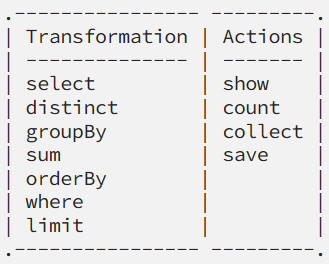